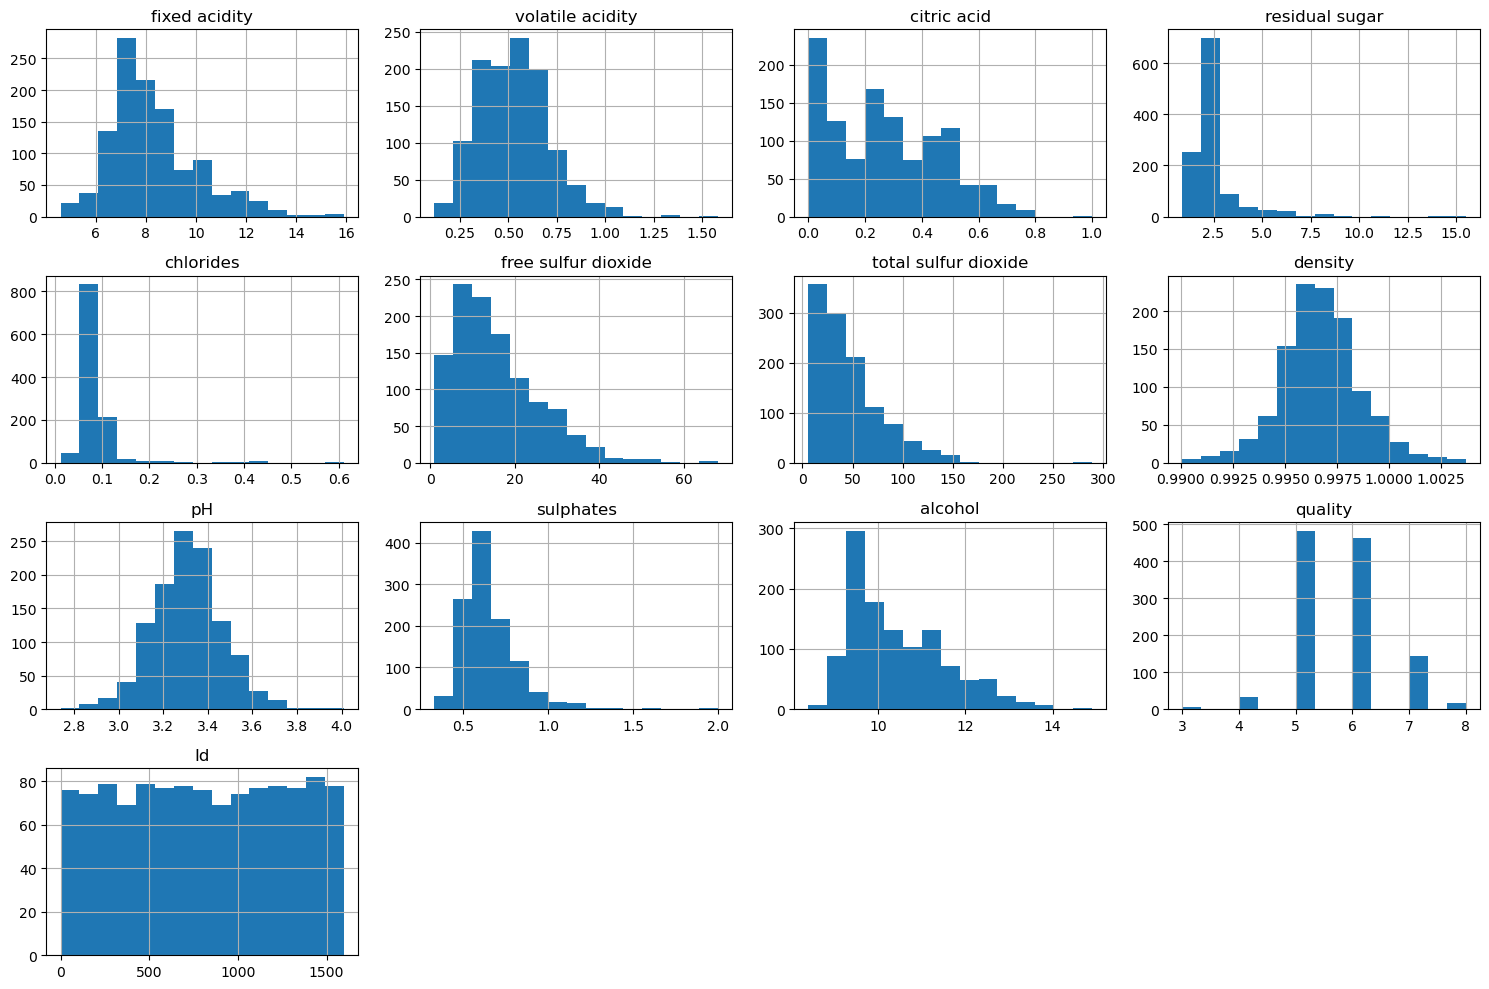

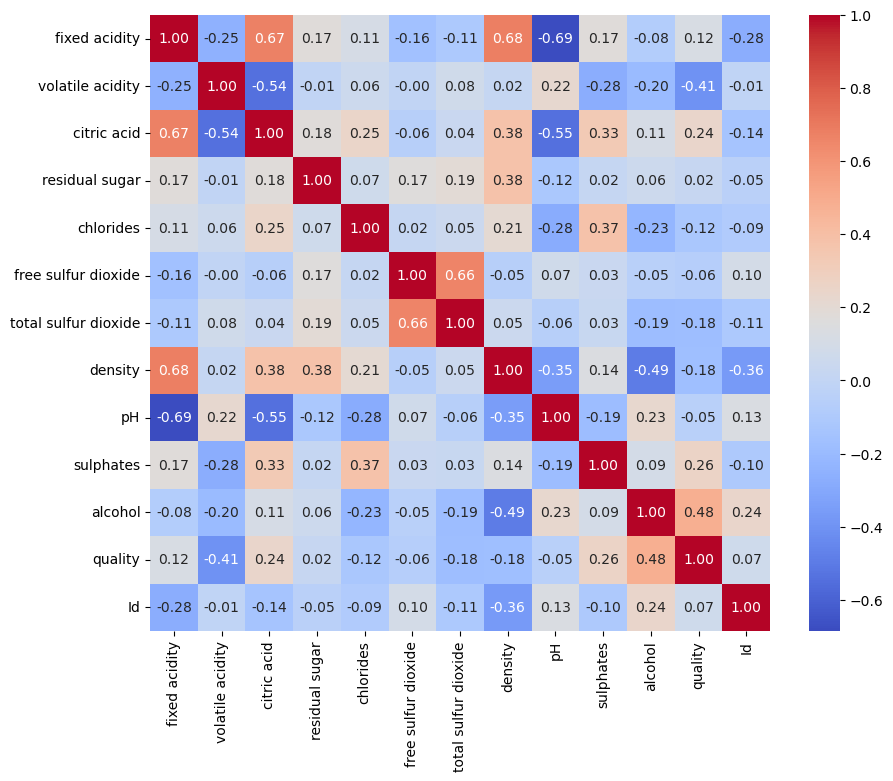

              precision    recall  f1-score   support

           3       0.00      1.00      0.00         0
           4       0.03      0.17      0.04         6
           5       0.75      0.53      0.62        96
           6       0.62      0.37      0.47        99
           7       0.31      0.42      0.35        26
           8       0.11      1.00      0.19         2

    accuracy                           0.45       229
   macro avg       0.30      0.58      0.28       229
weighted avg       0.62      0.45      0.51       229

[[ 0  0  0  0  0  0]
 [ 0  1  2  3  0  0]
 [ 5 21 51 15  2  2]
 [ 2 16 14 37 23  7]
 [ 0  1  1  5 11  8]
 [ 0  0  0  0  0  2]]


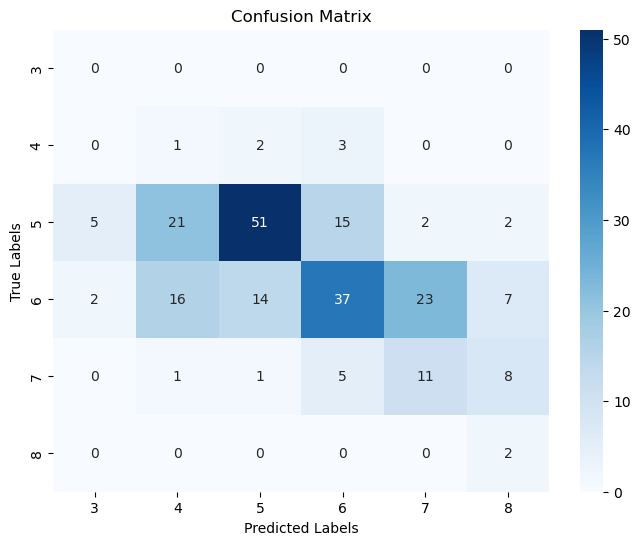

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler

# Load the dataset
data = pd.read_csv('WineQT.csv')

# Exploratory Data Analysis: Visualizing distributions and correlations
data.hist(bins=15, figsize=(15, 10), layout=(4, 4))
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

# Data Preprocessing
# Removing the 'Id' column as it is not relevant for modeling
data = data.drop(columns=['Id'])

# Splitting the data into features and target
X = data.drop(columns=['quality'])
y = data['quality']

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Handling imbalanced classes by oversampling
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train_scaled, y_train)

# Logistic Regression Model
model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_resampled, y_resampled)
y_pred = model.predict(X_test_scaled)

# Model Evaluation
print(classification_report(y_test, y_pred, zero_division=1))
print(confusion_matrix(y_test, y_pred))

# Visualizing the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Load and prepare the dataset
data = pd.read_csv('WineQT.csv')
data.drop(columns='Id', inplace=True)  # Assuming 'Id' is a column to be dropped

# Splitting the dataset into features and labels
X = data.drop('quality', axis=1)
y = data['quality']

# Adjust labels to be zero-indexed if necessary
y -= y.min()

# Handling imbalanced classes with SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SVM model
svm_model = SVC(kernel='linear', C=1)
svm_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_svm = svm_model.predict(X_test_scaled)

# Evaluation
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))


SVM Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        97
           1       0.56      0.63      0.59        92
           2       0.61      0.58      0.60       108
           3       0.47      0.38      0.42        95
           4       0.51      0.47      0.49        96
           5       0.74      0.82      0.77        92

    accuracy                           0.64       580
   macro avg       0.63      0.65      0.64       580
weighted avg       0.63      0.64      0.64       580

SVM Accuracy: 0.6448275862068965


C:\Users\budap\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │             390 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,182 (39.77 KB)

 Trainable params: 10,182 (39.77 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.2287 - loss: 1.7999 - val_accuracy: 0.5065 - val_loss: 1.3951
Epoch 2/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4341 - loss: 1.4291 - val_accuracy: 0.5302 - val_loss: 1.1626
Epoch 3/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4981 - loss: 1.2584 - val_accuracy: 0.5690 - val_loss: 1.0754
Epoch 4/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4957 - loss: 1.2136 - val_accuracy: 0.5948 - val_loss: 1.0208
Epoch 5/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4865 - loss: 1.1792 - val_accuracy: 0.5970 - val_loss: 0.9882
Epoch 6/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5459 - loss: 1.0979 - val_accuracy: 0.6185 - val_loss: 0.9601
Epoch 7/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5501 - loss: 1.0870 - val_accuracy: 0.6185 - val_loss: 0.9373
Epoch 8/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5790 - loss: 1.0778 - val_accuracy: 0.6358 - val_loss

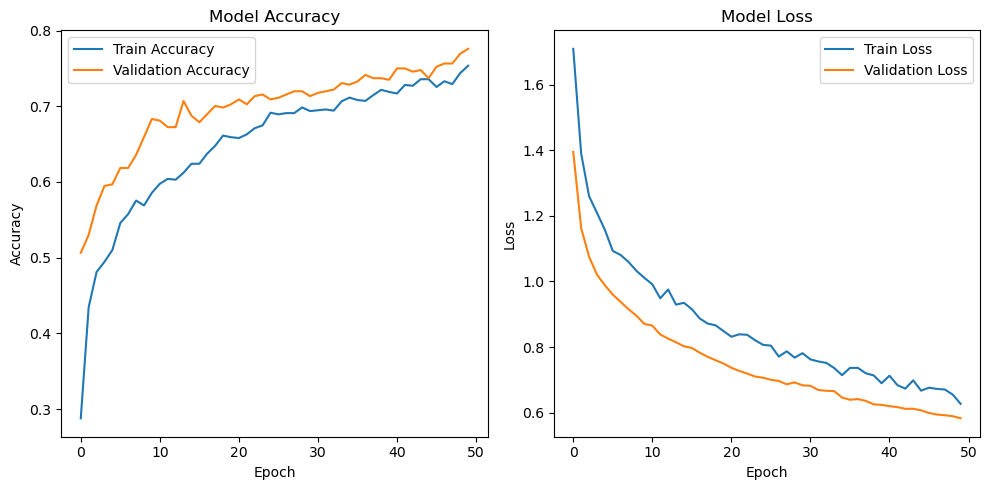

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Load and prepare the dataset
data = pd.read_csv('WineQT.csv')
data.drop(columns='Id', inplace=True)  # Dropping 'Id' column

# Splitting the dataset into features and labels
X = data.drop('quality', axis=1)
y = data['quality']

# Adjust labels to be zero-indexed
y -= min(y)

# Handling imbalanced classes with SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Neural Network Architecture
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(len(np.unique(y_res)), activation='softmax')  # Adjusting for the number of classes
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, validation_split=0.2, batch_size=32, verbose=1)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test_scaled, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

# Visualizing Training and Validation Metrics
import matplotlib.pyplot as plt

# Accuracy plot
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
